In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Activation, BatchNormalization, MaxPooling2D
from keras.models import Sequential

In [2]:
#data_dir = './data/'
#train_path = './data/Train/'
#test_path = './data/'

data_dir = './GTSRB/'
train_path = "./GTSRB/Train"
test_path = "./GTSRB/Test"

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [3]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + 'Train/' + str(i)
    images = os.listdir(path)

    for j in images:
    
        image = Image.open(path + '/' + j)
        #print(image)
        image = image.resize((IMG_HEIGHT,IMG_WIDTH))
        image = np.array(image)
        #sim = Image.fromarray(image)
        image_data.append(image)
        image_labels.append(i)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [7]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(31367, 43)
(7842, 43)


In [8]:
# Building model, simple LENET 5 structure

model = Sequential()

model.add(Conv2D(16, (3, 3), padding="same", activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, channels)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
# first set of (CONV => RELU => CONV => RELU) * 2 => POOL
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
# second set of (CONV => RELU => CONV => RELU) * 2 => POOL
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
# first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
# second set of FC => RELU layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
# softmax classifier
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 64)        2

In [9]:
lr = 0.001
epochs = 15

opt = Adam(lr=lr) # decay=lr / (epochs * 0.5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

vgg = model.fit(aug.flow(X_train, y_train,batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
981/981 [==============================] - 11s 9ms/step - loss: 3.0039 - accuracy: 0.2665 - val_loss: 0.4855 - val_accuracy: 0.8485
Epoch 2/15
981/981 [==============================] - 8s 8ms/step - loss: 0.5595 - accuracy: 0.8233 - val_loss: 0.2856 - val_accuracy: 0.9028
Epoch 3/15
981/981 [==============================] - 8s 8ms/step - loss: 0.2165 - accuracy: 0.9356 - val_loss: 0.0566 - val_accuracy: 0.9833
Epoch 4/15
981/981 [==============================] - 8s 9ms/step - loss: 0.1389 - accuracy: 0.9572 - val_loss: 0.0623 - val_accuracy: 0.9807
Epoch 5/15
981/981 [==============================] - 9s 9ms/step - loss: 0.1123 - accuracy: 0.9649 - val_loss: 0.0249 - val_accuracy: 0.9925
Epoch 6/15
981/981 [==============================] - 8s 9ms/step - loss: 0.0965 - accuracy: 0.9704 - val_loss: 0.0682 - val_accuracy: 0.9772
Epoch 7/15
981/981 [==============================] - 8s 9ms/step - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.0202 - val_accuracy: 0.9936
Epoch

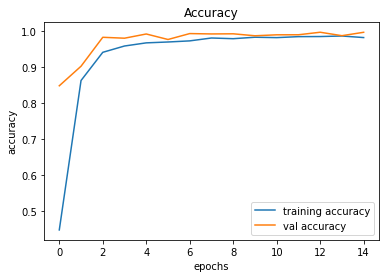

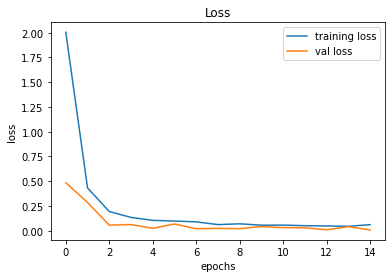

In [11]:
# plotting graphs for accuracy 

plt.figure(0)
plt.plot(vgg.history['accuracy'], label='training accuracy')
plt.plot(vgg.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(vgg.history['loss'], label='training loss')
plt.plot(vgg.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
# imgs = test["Path"].values

data =[]

for j in os.listdir(test_path):
        
            image = Image.open(test_path + '/' + j)
            image = image.resize((IMG_HEIGHT,IMG_WIDTH))
            image = np.array(image)
            data.append(image)

X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1) # model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  97.26049089469517
